In [1]:
#https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import cv2
import tensorflow as tf
'''
for dirname, _, filenames in os.walk('/Users/joyceli/Desktop/MECENG249/CNN/figuredata/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        '''
nRowsRead = 1000 # specify 'None' if want to read whole file
# Output.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/Users/joyceli/Desktop/MECENG249/CNN/archive/PMdata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'PMdata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1 = df1.set_index('fileName')

# Test out how to get the PM25 values for matching later
print(df1.loc['201612200830.jpg']['PM25'])
df1.head(5)


There are 206 rows and 2 columns
342


,PM25
fileName,
201612200830.jpg,342
201612200930.jpg,336
201612201030.jpg,387
201612201130.jpg,341
201612201230.jpg,256


201702261130.jpg


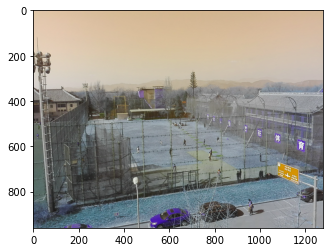

image array: 
 [[[219 193 169]
  [220 194 170]
  [223 195 171]
  ...
  [213 184 153]
  [213 184 153]
  [212 183 152]]

 [[228 202 178]
  [228 202 178]
  [229 201 177]
  ...
  [213 184 153]
  [213 184 153]
  [214 185 154]]

 [[225 200 174]
  [225 200 174]
  [226 199 173]
  ...
  [213 184 153]
  [214 185 154]
  [214 185 154]]

 ...

 [[ 75  99 127]
  [ 78 102 130]
  [ 82 106 134]
  ...
  [156 156 162]
  [155 158 163]
  [155 158 163]]

 [[ 82 103 131]
  [ 57  78 106]
  [ 49  70  98]
  ...
  [157 157 163]
  [158 158 164]
  [155 158 163]]

 [[ 91 107 136]
  [ 73  89 118]
  [ 59  75 104]
  ...
  [157 157 163]
  [159 159 165]
  [158 158 164]]]
image array shape:  (960, 1280, 3)


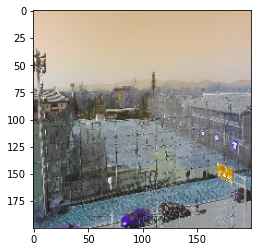

New array shape:  (200, 200, 3)


In [2]:

DATADIR = '/Users/joyceli/Desktop/MECENG249/CNN/'

folder_name = "figuredata"
path = '/Users/joyceli/Desktop/MECENG249/CNN/figuredata'
#path = os.path.join(DATADIR,folder_name)  # create path to the air quality photos
img_array = []
img = os.listdir(path)[0]
print(img)
img_array = cv2.imread(os.path.join(path,img)) #,cv2.IMREAD_GRAYSCALE)  # convert to array

plt.imshow(img_array)  # graph it
plt.show()  # display

print("image array: \n",img_array)
print("image array shape: ",img_array.shape)

#reshape image and pixelate
img_size = 200
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)# cmap='gray')
plt.show()

# create the data array for CNNs

Xdata = []
ydata = []

# the PM2.5 readings are stored similar to class numbers in a classification model
for img in os.listdir(path):
    try:
        img_array = cv2.imread(os.path.join(path,img)) #convert the image to an array
        new_array = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
        Xdata.append(new_array)
        ydata.append(df1.loc[str(img)]['PM25'])
    except Exception as e:
            pass
    #print(df1[str(img)]['PM25'])    
print("New array shape: ", new_array.shape)

Xdata = np.array(Xdata)
ydata = np.array(ydata)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xdata,ydata, test_size = 0.2, random_state=25)


Text(0.5, 1.0, 'Ground Truth : 34')

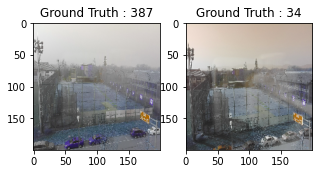

In [4]:
#Source: CNN skeleton code from ME249

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0], cmap='gray')
plt.title("Ground Truth : {}".format(y_train[0]))

# Display the first image in testing data
plt.subplot(122) #For example, "111" means "1x1 grid, first subplot" and "234" means "2x3 grid, 4th subplot".
plt.imshow(X_test[0], cmap='gray')
plt.title("Ground Truth : {}".format(y_test[0]))

In [5]:

# #Source: CNN skeleton code from ME249

# X_train = X_train.reshape(-1, 100,100, 1)
# X_train = X_train.astype('float32')
# X_train = X_train / 255.


# X_test = X_test.reshape(-1, 100,100, 1)
# x_test = X_test.astype('float32')
# X_test = X_test / 255.

# X_train.shape, X_test.shape


In [11]:
#THE NETWORK -NOTE THAT CELLS ABOVE THIS ONE WERE NOT CHANGED AND ARE IDENTICAL TO    <<<<<<<< *******
#             THE CODE FOR THE NON-DROPOUT MODEL

'''The images are of size 28 x 28. You convert the image matrix to an array, 
rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, 
and feed this as an input to the network.
You'll use three convolutional layers:
The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.'''

#First, import all the necessary modules required to train the model.
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, ReLU

# Adding Dropout into the Network

'''You can add a dropout layer to overcome the problem of overfitting to some extent. Dropout randomly 
turns off a fraction of neurons during the training process, reducing the dependency on the training 
set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, 
which can be tuned accordingly. This way, turning off some neurons will not allow the network to 
memorize the training data since not all the neurons will be active at the same time and the inactive 
neurons will not be able to learn anything.
'''

#same as before:
batch_size = 30
epochs = 100
num_classes = 1


#NEURAL NETWORK ARCHITECTURE

pm25_model = Sequential()
pm25_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(img_size,img_size,3)))
pm25_model.add(ReLU())
pm25_model.add(MaxPooling2D((2, 2),padding='same'))  #same to here
pm25_model.add(Dropout(0.25)) #added

pm25_model.add(Conv2D(64, (3, 3), activation='relu',padding='same')) # next three the same
pm25_model.add(ReLU())
pm25_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
pm25_model.add(Dropout(0.25)) #added

pm25_model.add(Conv2D(128, (3, 3), activation='relu',padding='same')) # next three the same
pm25_model.add(ReLU())                  
pm25_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
pm25_model.add(Dropout(0.4))  #added

pm25_model.add(Flatten())                        # next three the same
pm25_model.add(Dense(128, activation='relu'))
pm25_model.add(ReLU())  
pm25_model.add(Dropout(0.3))  #added

pm25_model.add(Dense(num_classes))# the same

#SUMMARIZE MODEL
'''To visualize the layers that created in the above step, use the summary function. 
This will show some parameters (weights and biases) in each layer and also the total parameters in your model.'''
pm25_model.summary()

#COMPLIE THE MODEL
'''After the model is created, you compile it using the Adam optimizer, one of the 
most popular optimization algorithms. You can read more about this optimizer here. 
Additionally, you specify the loss type which is categorical cross entropy which 
is used for multi-class classification, you can also use binary cross-entropy as 
the loss function. Lastly, you specify the metrics as accuracy which you want to 
analyze while the model is training.'''
pm25_model.compile(loss='mse', optimizer=keras.optimizers.Adam(),metrics=[tf.keras.metrics.MeanSquaredError()])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 200, 200, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
re_lu_10 (ReLU)              (None, 100, 100, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 64)       

In [14]:
#TRAIN THE MODEL
'''It's finally time to train the model with Keras' fit() function! The model trains for 20 epochs. 
The fit() function will return a history object; By storying the result of this function 
in fashion_train, you can use it later to plot the accuracy and loss function plots between 
training and validation which will help you to analyze your model's performance visually.'''
#just changed name here
epochs = 200
pm25_train_dropout = pm25_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1)#,validation_data=(X_test, y_test))

'''This added code will save the model so that you can directly load it and not have to train it again 
for 20 epochs. This way, you can load the model later on if you need it and modify the architecture;'''
pm25_model.save("pm25_model_dropout.h5py")

Epoch 1/200
164/164 [==============================] - 13s 77ms/step - loss: 2192.6614 - mean_squared_error: 65504.4375
Epoch 2/200
164/164 [==============================] - 18s 110ms/step - loss: 2350.8204 - mean_squared_error: 64884.4062
Epoch 3/200
164/164 [==============================] - 12s 72ms/step - loss: 2349.4904 - mean_squared_error: 64272.6250
Epoch 4/200
164/164 [==============================] - 10s 64ms/step - loss: 2390.0688 - mean_squared_error: 63676.7148
Epoch 5/200
164/164 [==============================] - 11s 65ms/step - loss: 1550.7651 - mean_squared_error: 63084.4062
Epoch 6/200
164/164 [==============================] - 11s 64ms/step - loss: 1565.1217 - mean_squared_error: 62501.5664
Epoch 7/200
164/164 [==============================] - 10s 63ms/step - loss: 1933.7361 - mean_squared_error: 61932.6445
Epoch 8/200
164/164 [==============================] - 10s 63ms/step - loss: 1552.3243 - mean_squared_error: 61373.3633
Epoch 9/200
164/164 [==================

In [15]:
ypredict = pm25_model.predict(X_test)
dfy = pd.DataFrame(ypredict, y_test)
dfy


,0
34,19.159407
7,6.326302
3,2.269059
77,46.950996
20,7.565602
3,4.979892
166,111.663361
20,7.633313
5,3.994788
30,20.962528
